In [1]:

print("Hello, World!")

import pandas as pd
print(pd.__version__)


Hello, World!
2.2.3


In [2]:

data = pd.read_csv('weatherreadings1.csv')

# We can print the first 5 rows of the .csv
print(data.head())


                                 siteId        reportStartDateTime  \
0  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T16:15:00+00:00   
1  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T16:45:00+00:00   
2  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T17:00:00+00:00   
3  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T17:15:00+00:00   
4  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T17:30:00+00:00   

           reportEndDateTime  collectionName  isPublic  isLatestVersion  \
0  2024-10-02T16:15:00+00:00               1      True             True   
1  2024-10-02T16:45:00+00:00               1      True             True   
2  2024-10-02T17:00:00+00:00               1      True             True   
3  2024-10-02T17:15:00+00:00               1      True             True   
4  2024-10-02T17:30:00+00:00               1      True             True   

   observationType softwareType  windDirection  relativeHumidity  ...  isDcnn  \
0                1  WeatherLink            322 

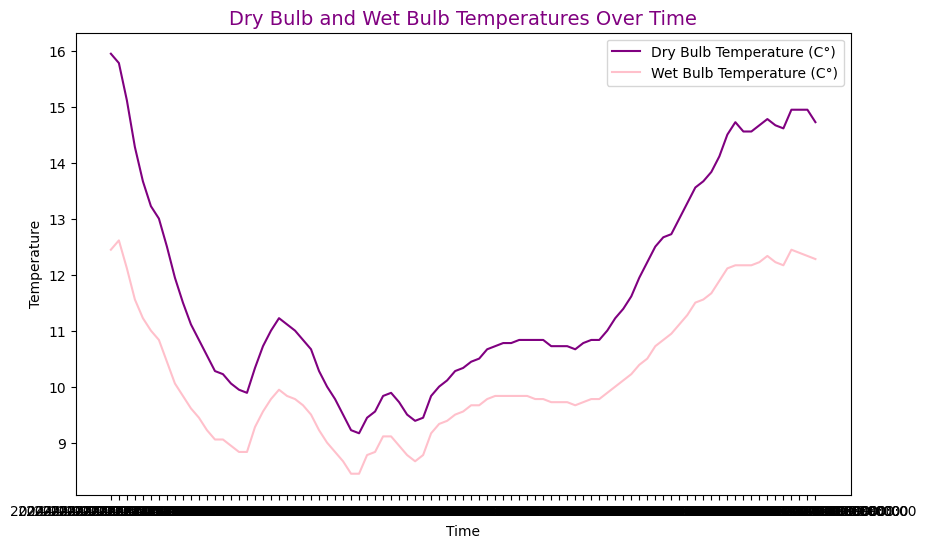

In [4]:
# We start by imorting Matplotlib's pyplot module

import matplotlib.pyplot as plt

# Let's see what a plot that is 10" X 6" is like

plt.figure(figsize=(10, 6))

# We now use pyplot to plot time against temperature and define the legend.
## Added wet bulb for the craic
 
plt.plot (data['reportEndDateTime'], data['dryBulbTemperature_Celsius'], label='Dry Bulb Temperature (C°)', color='purple')
plt.plot (data['reportEndDateTime'], data['wetBulbTemperature_Celsius'], label='Wet Bulb Temperature (C°)', color='pink' )

# Label the x-axis
plt.xlabel("Time")

# Label the y-axis
plt.ylabel("Temperature")

# We'll add a title and a legend
plt.title('Dry Bulb and Wet Bulb Temperatures Over Time', fontsize=14, color='purple')
plt.legend()
plt.show()
